# Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Loading Data

In [2]:
# Load the dataset
file_path = "synthetic_fraud_dataset.csv"  
df = pd.read_csv(file_path)

In [3]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [5]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


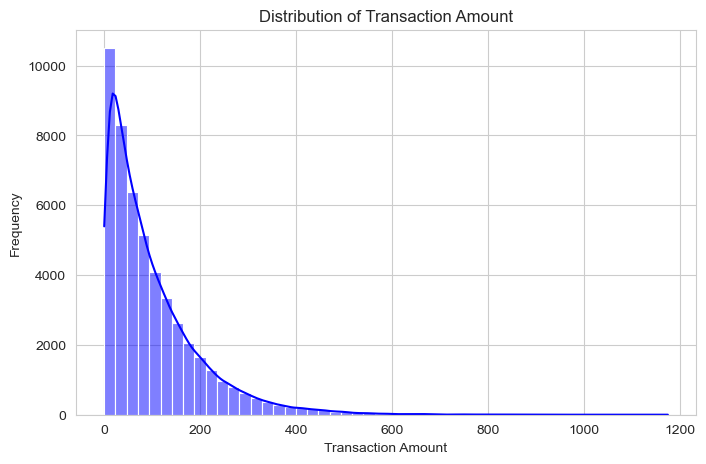

In [6]:
# 1. Distribution of Transaction Amount
plt.figure(figsize=(8, 5))
sns.histplot(df['Transaction_Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\rohan\AppData\Local\Temp\ipykernel_18132\3746818710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transaction_Type', data=df, palette='viridis', order=df['Transaction_Type'].value_counts().index)


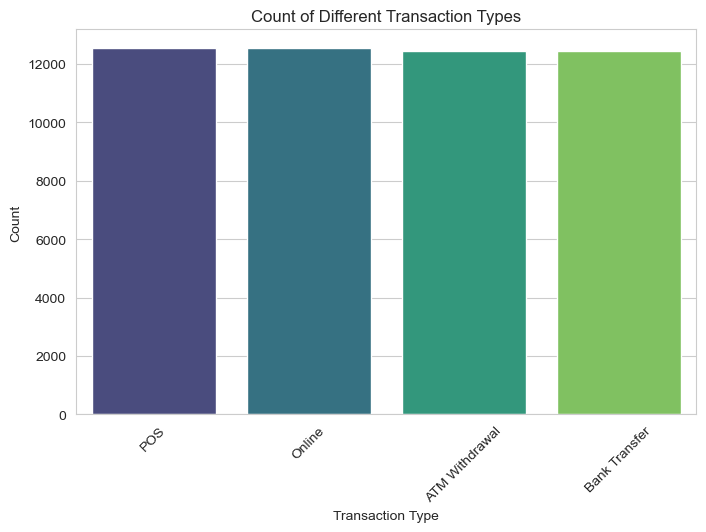

In [7]:
# 2. Count of Transaction Types
plt.figure(figsize=(8, 5))
sns.countplot(x='Transaction_Type', data=df, palette='viridis', order=df['Transaction_Type'].value_counts().index)
plt.title('Count of Different Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\rohan\AppData\Local\Temp\ipykernel_18132\962464656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud_Label', data=df, palette=['green', 'red'])


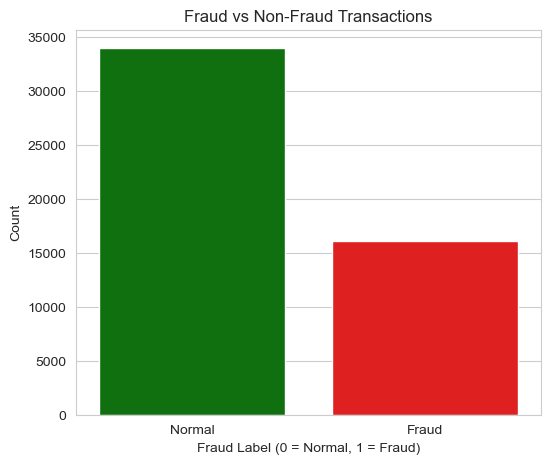

In [8]:
# 3. Fraud vs. Non-Fraud Transactions
plt.figure(figsize=(6, 5))
sns.countplot(x='Fraud_Label', data=df, palette=['green', 'red'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Fraud Label (0 = Normal, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()

C:\Users\rohan\AppData\Local\Temp\ipykernel_18132\975971239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud_Label', y='Account_Balance', data=df, palette=['blue', 'red'])


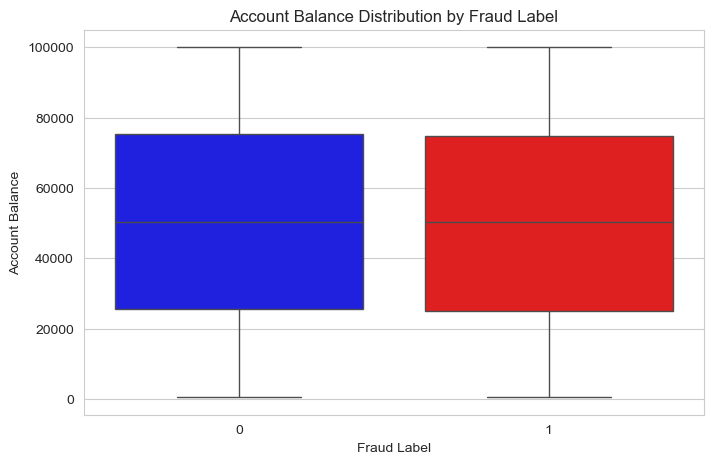

In [9]:
# 4. Boxplot of Account Balance by Fraud Label
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraud_Label', y='Account_Balance', data=df, palette=['blue', 'red'])
plt.title('Account Balance Distribution by Fraud Label')
plt.xlabel('Fraud Label')
plt.ylabel('Account Balance')
plt.show()

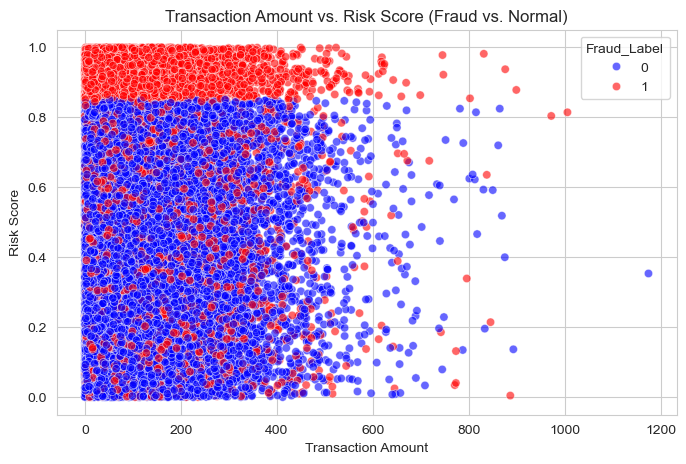

In [15]:
# 5 Scatter plot of Transaction Amount vs. Risk Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Transaction_Amount', y='Risk_Score', hue='Fraud_Label', palette=['blue', 'red'], alpha=0.6)
plt.title('Transaction Amount vs. Risk Score (Fraud vs. Normal)')
plt.xlabel('Transaction Amount')
plt.ylabel('Risk Score')
plt.show()


C:\Users\rohan\AppData\Local\Temp\ipykernel_18132\367275046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud_Label', y='Avg_Transaction_Amount_7d', data=df, palette=['blue', 'red'])


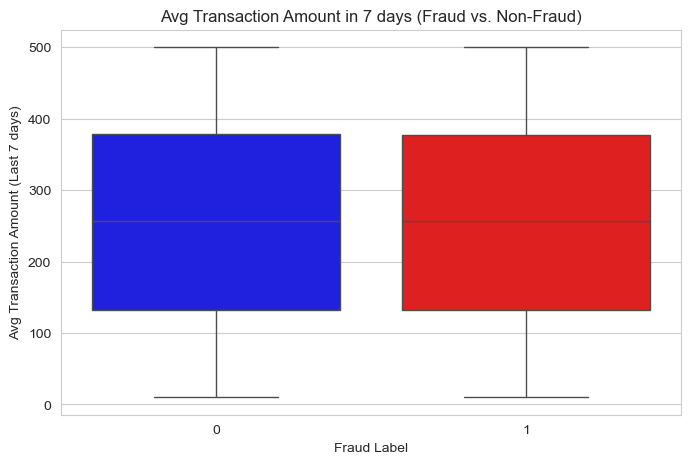

In [11]:
# 6. Average Transaction Amount in the last 7 days (Fraud vs. Non-Fraud)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraud_Label', y='Avg_Transaction_Amount_7d', data=df, palette=['blue', 'red'])
plt.title('Avg Transaction Amount in 7 days (Fraud vs. Non-Fraud)')
plt.xlabel('Fraud Label')
plt.ylabel('Avg Transaction Amount (Last 7 days)')
plt.show()

C:\Users\rohan\AppData\Local\Temp\ipykernel_18132\3278995048.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fraud_Label'] == 0]['Risk_Score'], label="Normal", shade=True, color="blue")
C:\Users\rohan\AppData\Local\Temp\ipykernel_18132\3278995048.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Fraud_Label'] == 1]['Risk_Score'], label="Fraud", shade=True, color="red")


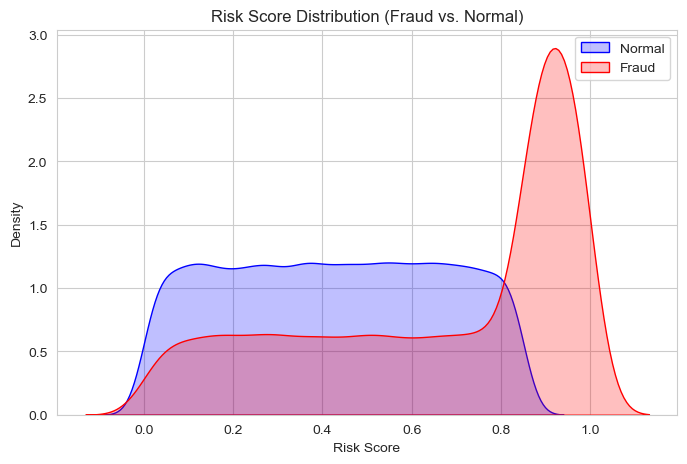

In [12]:
# 7. Risk Score Distribution by Fraud Label
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Fraud_Label'] == 0]['Risk_Score'], label="Normal", shade=True, color="blue")
sns.kdeplot(df[df['Fraud_Label'] == 1]['Risk_Score'], label="Fraud", shade=True, color="red")
plt.title('Risk Score Distribution (Fraud vs. Normal)')
plt.xlabel('Risk Score')
plt.legend()
plt.show()

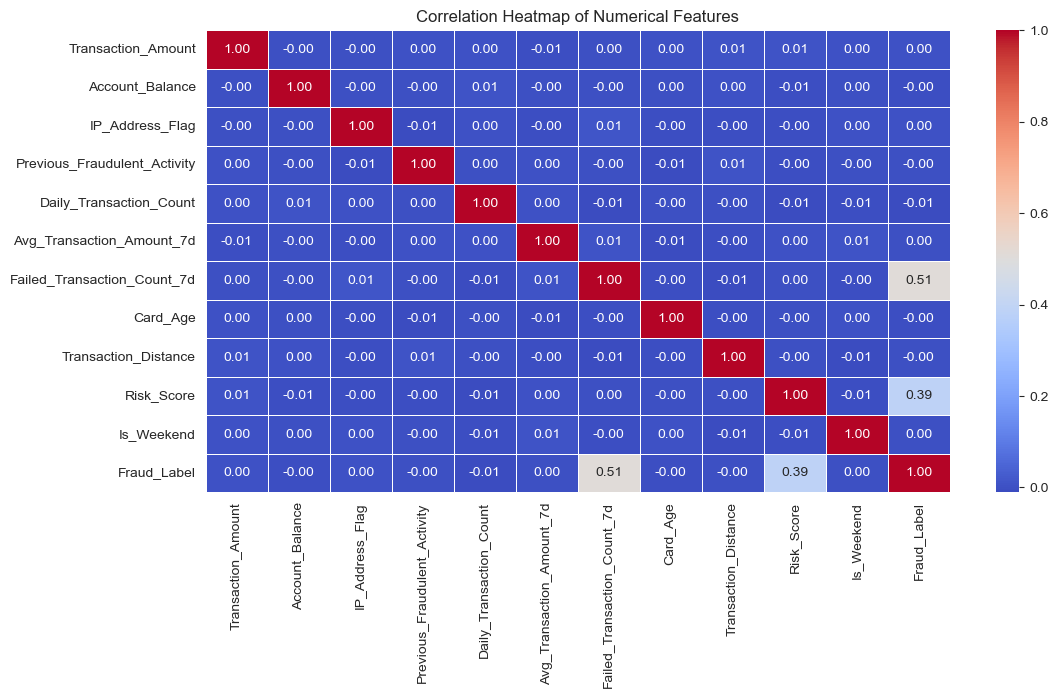

In [13]:
# 8 Correlation Heatmap for numerical features
plt.figure(figsize=(12, 6))
numeric_features = df.select_dtypes(include=['number'])  # Selecting only numeric columns
corr_matrix = numeric_features.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Data Preprocessing

In [16]:
# Convert Timestamp to datetime and extract useful features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday  # Monday = 0, Sunday = 6
df.drop(columns=['Timestamp'], inplace=True)  # Drop the original timestamp

In [17]:
# Drop non-relevant columns
df.drop(columns=['Transaction_ID', 'User_ID'], inplace=True)  

In [18]:
# Encode categorical features
categorical_cols = ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 
                    'Card_Type', 'Authentication_Method']

In [21]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [22]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Transaction_Amount', 'Account_Balance', 'Risk_Score', 'Avg_Transaction_Amount_7d',
                  'Transaction_Distance', 'Card_Age', 'Failed_Transaction_Count_7d', 'Daily_Transaction_Count']


In [23]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [25]:
# Drop the fraud label column (unsupervised learning models don’t use labels)
df_unsupervised = df.drop(columns=['Fraud_Label'])  


# Machine learning

## Training

In [26]:
from sklearn.ensemble import IsolationForest

In [27]:
# Train Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

In [28]:
df_unsupervised['Anomaly_Score_IF'] = iso_forest.fit_predict(df_unsupervised)

In [29]:
# Convert predictions (-1 = anomaly, 1 = normal)
df_unsupervised['Anomaly_IF'] = df_unsupervised['Anomaly_Score_IF'].apply(lambda x: 1 if x == -1 else 0)


In [30]:
# Display results
print("Isolation Forest Results:")
print(df_unsupervised[['Anomaly_IF']].value_counts())

Isolation Forest Results:
Anomaly_IF
0             47500
1              2500
Name: count, dtype: int64


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
# Define input shape
input_dim = df_unsupervised.shape[1]

In [33]:
# Build Autoencoder Model
autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

In [34]:
autoencoder.compile(optimizer='adam', loss='mse')

In [35]:
# Train Autoencoder
autoencoder.fit(df_unsupervised, df_unsupervised, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.3890
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9481
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9227
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9207
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9202
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9184
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9177
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9190
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9183
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9165


In [38]:
# Compute Reconstruction Error
reconstructed = autoencoder.predict(df_unsupervised)
reconstruction_error = ((df_unsupervised - reconstructed) ** 2).mean(axis=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step


In [39]:
# Set anomaly threshold (90th percentile)
threshold = np.percentile(reconstruction_error, 90)

In [40]:
# Detect anomalies
df_unsupervised['Anomaly_AE'] = (reconstruction_error > threshold).astype(int)

In [41]:
# Display results
print("Autoencoder Results:")
print(df_unsupervised[['Anomaly_AE']].value_counts())

Autoencoder Results:
Anomaly_AE
0             45000
1              5000
Name: count, dtype: int64


## Assessing models

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# True Labels (Fraud_Label)
y_true = df['Fraud_Label']

# Isolation Forest Predictions
y_pred_if = df_unsupervised['Anomaly_IF']

# Autoencoder Predictions
y_pred_ae = df_unsupervised['Anomaly_AE']

# Print Classification Report
print("🔹 Isolation Forest Metrics:")
print(classification_report(y_true, y_pred_if))

print("\n🔹 Autoencoder Metrics:")
print(classification_report(y_true, y_pred_ae))


🔹 Isolation Forest Metrics:
              precision    recall  f1-score   support

           0       0.68      0.95      0.79     33933
           1       0.36      0.06      0.10     16067

    accuracy                           0.66     50000
   macro avg       0.52      0.50      0.44     50000
weighted avg       0.58      0.66      0.57     50000


🔹 Autoencoder Metrics:
              precision    recall  f1-score   support

           0       0.69      0.91      0.79     33933
           1       0.42      0.13      0.20     16067

    accuracy                           0.66     50000
   macro avg       0.55      0.52      0.49     50000
weighted avg       0.60      0.66      0.60     50000



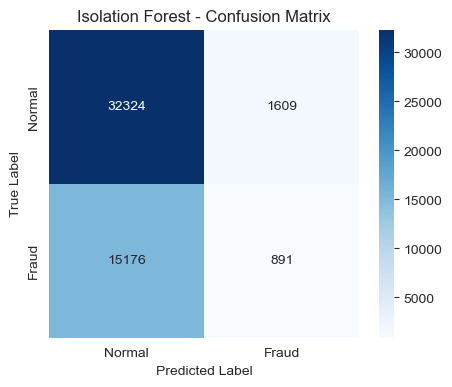

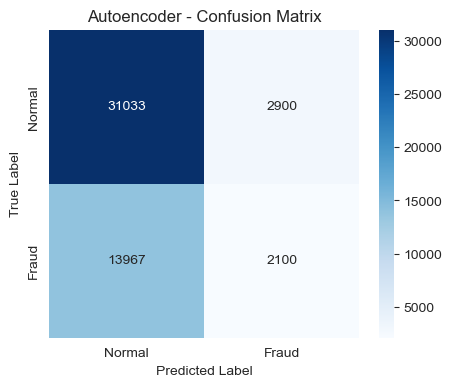

In [43]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Plot Confusion Matrix for Both Models
plot_confusion_matrix(y_true, y_pred_if, "Isolation Forest")
plot_confusion_matrix(y_true, y_pred_ae, "Autoencoder")


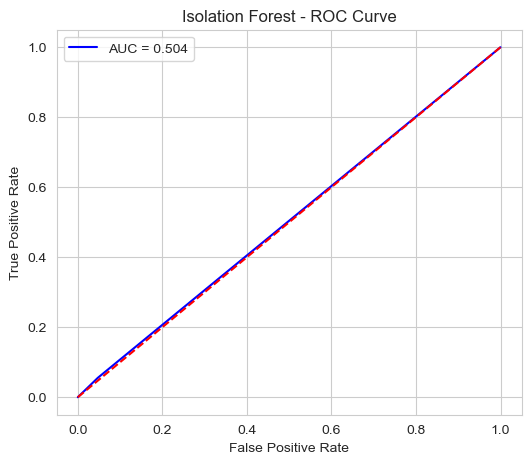

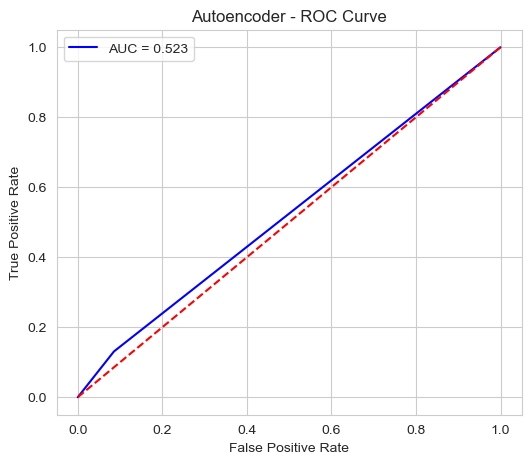

In [45]:
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.3f}")
    plt.plot([0,1], [0,1], 'r--')  # Random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

# Plot ROC Curve for Both Models
plot_roc_curve(y_true, y_pred_if, "Isolation Forest")
plot_roc_curve(y_true, y_pred_ae, "Autoencoder")


# Save model and Preprocessing  for Future use

In [47]:
import joblib 

joblib.dump(iso_forest, "isolation_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']